In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('clean_df_3_single_weapon.csv')
df.head()

,Agency Type,Victim Sex,Victim Age,Victim Ethnicity,Perpetrator Sex,Perpetrator Ethnicity,Weapon Category,Relationship Category,Region,Season
0,Other Police,Female,26,Not Hispanic,Male,Not Hispanic,Non-Firearm,Lover,West,Autumn
1,Sheriff,Male,23,Not Hispanic,Male,Not Hispanic,Firearm,Acquaintance,South,Summer
2,Sheriff,Male,42,Not Hispanic,Female,Not Hispanic,Firearm,Lover,South,Summer
3,Sheriff,Male,33,Not Hispanic,Male,Not Hispanic,Firearm,Acquaintance,South,Summer
4,Sheriff,Male,46,Not Hispanic,Male,Not Hispanic,Firearm,Family,South,Autumn


In [6]:
df.columns

Index(['Agency Type', 'Victim Sex', 'Victim Age', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Ethnicity', 'Weapon Category',
       'Relationship Category', 'Region', 'Season'],
      dtype='object')

In [7]:
# 1. Clean Data
categorical_columns = ['Agency Type', 'Victim Sex', 'Victim Age', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Ethnicity',
       'Relationship Category', 'Region', 'Season']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

target_encoder = LabelEncoder()
df["Weapon Category"] = target_encoder.fit_transform(df['Weapon Category']) 

X = df.drop(columns=["Weapon Category"])
y = df["Weapon Category"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

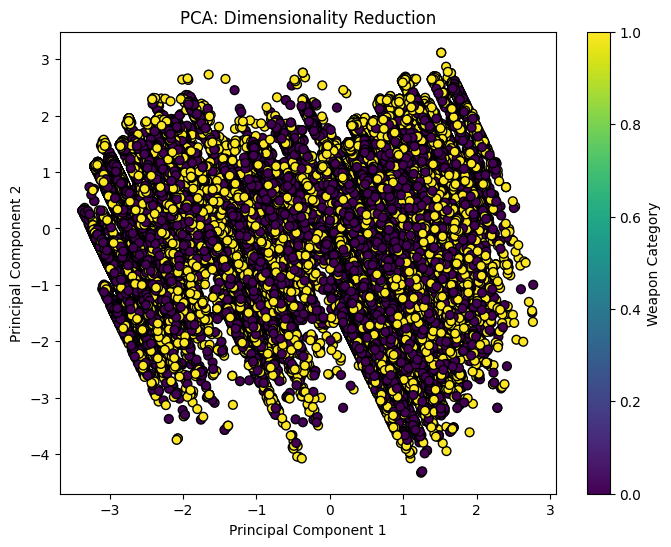

In [11]:
# 2. PCA (Work better on this)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization (maybe change this)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k", s=40)
plt.title("PCA: Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Weapon Category")
plt.show()

In [9]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train

array([[-0.49210838,  0.57962764, -1.58561012, ...,  0.5342886 ,
        -1.02607156, -0.5582741 ],
       [-0.49210838,  1.15869519, -1.00610936, ...,  0.5342886 ,
        -0.24046362, -0.5582741 ],
       [ 1.56027486,  0.57962764,  1.02214328, ...,  0.5342886 ,
        -1.02607156,  1.90357412],
       ...,
       [ 1.56027486,  0.57962764, -1.58561012, ...,  0.5342886 ,
        -1.02607156,  1.90357412],
       [-0.49210838, -1.09966826,  0.15289215, ..., -1.87164766,
        -1.02607156, -0.5582741 ],
       [ 1.56027486,  0.7533479 , -0.13685823, ...,  0.5342886 ,
         0.54514433,  1.90357412]], shape=(122825, 12))

In [10]:
# 4. Build and Train the ANN Model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

C:\Users\patbr\PycharmProjects\sandbox\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6824 - loss: 0.6051 - val_accuracy: 0.6912 - val_loss: 0.5959
Epoch 2/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6960 - loss: 0.5909 - val_accuracy: 0.6966 - val_loss: 0.5924
Epoch 3/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7008 - loss: 0.5849 - val_accuracy: 0.6957 - val_loss: 0.5895
Epoch 4/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6987 - loss: 0.5870 - val_accuracy: 0.6983 - val_loss: 0.5890
Epoch 5/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7029 - loss: 0.5834 - val_accuracy: 0.7001 - val_loss: 0.5876
Epoch 6/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7039 - loss: 0.5824 - val_accuracy: 0.6981 - val_loss: 0.5883
Epoch 7/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7036 - loss: 0.5821 - val_accuracy: 0.6999 - val_loss: 0.5869
Epoch 8/50
12281/12281 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 

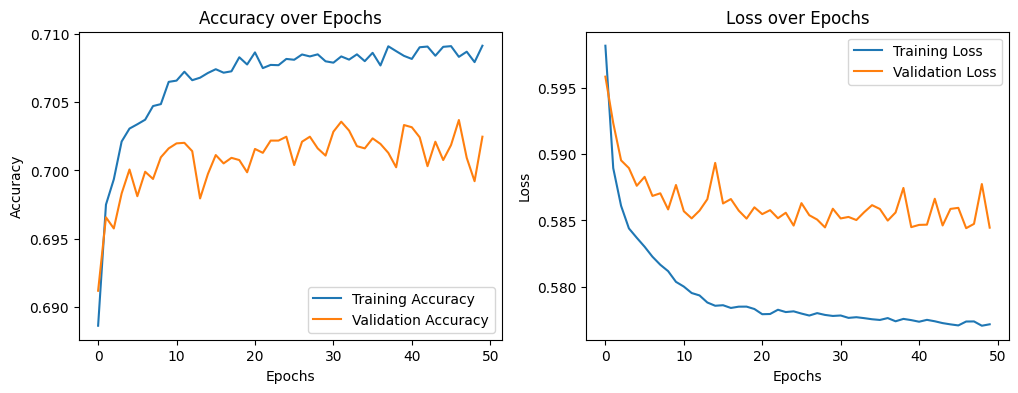

In [12]:
# 5. Evaluate the Model
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[19215  1383]
 [ 7740  2365]]

Classification Report:
              precision    recall  f1-score   support

     Firearm       0.71      0.93      0.81     20598
 Non-Firearm       0.63      0.23      0.34     10105

    accuracy                           0.70     30703
   macro avg       0.67      0.58      0.57     30703
weighted avg       0.69      0.70      0.65     30703



Results explanation provided by ChatGPT:

Here’s a simple explanation of your model's performance based on the output:
Confusion Matrix:

The confusion matrix shows how well the model is classifying each category:

    [19289 1312]:
        19,289 "Firearm" cases were correctly classified (True Positives).
        1,312 "Firearm" cases were incorrectly classified as "Non-Firearm" (False Negatives).
    [7788 2318]:
        7,788 "Non-Firearm" cases were incorrectly classified as "Firearm" (False Positives).
        2,318 "Non-Firearm" cases were correctly classified (True Negatives).

Classification Report:

    Precision: The proportion of predicted positive cases that are actually correct.
        Firearm: 71% of cases predicted as "Firearm" were correct.
        Non-Firearm: 64% of cases predicted as "Non-Firearm" were correct.

    Recall (Sensitivity): The proportion of actual positive cases that were correctly identified.
        Firearm: The model correctly identified 94% of the actual "Firearm" cases.
        Non-Firearm: The model correctly identified only 23% of the actual "Non-Firearm" cases. This is low, meaning many "Non-Firearm" cases were misclassified as "Firearm."

    F1-Score: The harmonic mean of precision and recall (a balance between the two).
        Firearm: 0.81 indicates good performance for the "Firearm" category.
        Non-Firearm: 0.34 indicates poor performance for the "Non-Firearm" category.

    Support: The number of actual cases for each category.
        "Firearm": 20,601 cases.
        "Non-Firearm": 10,106 cases.

Overall Metrics:

    Accuracy (70%): The model correctly classified 70% of all cases.
    Macro Average:
        Precision, recall, and F1-score averaged equally for both classes, giving a score of 0.68, 0.58, and 0.57 respectively.
    Weighted Average:
        Accounts for the imbalance in the dataset by giving more weight to the majority class ("Firearm"). Hence, the weighted averages are slightly better.

Summary:

    The model performs well for the "Firearm" category, with high recall (94%) and a good F1-score (0.81).
    However, the model struggles with the "Non-Firearm" category, as evidenced by the low recall (23%) and F1-score (0.34).
    This imbalance suggests the model may need further tuning or rebalancing to handle the minority class ("Non-Firearm") better.

Suggestions for Improvement:

    Handle Class Imbalance:
        Use techniques like oversampling the "Non-Firearm" class (SMOTE) or undersampling the "Firearm" class.
        Apply class weighting in the loss function to penalize incorrect predictions for "Non-Firearm" more heavily.
    Feature Engineering:
        Investigate if additional features can improve separability between the classes.
    Hyperparameter Tuning:
        Optimize the ANN architecture (e.g., more neurons, layers, or different activation functions).
    Advanced Models:
        Explore ensemble methods like Random Forest or Gradient Boosted Trees, which may perform better with imbalanced data.

Would you like detailed help with any of these strategies?